In [0]:
!pip3 install tensorflow-gpu==2.0.0

In [0]:
import tensorflow as tf
keras, L = tf.keras, tf.keras.layers

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz
!tar -xzf imagenette2.tgz

--2020-02-24 09:50:23--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.47.22
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.47.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1556914727 (1.4G) [application/x-tar]
Saving to: ‘imagenette2.tgz’

imagenette2.tgz     100%[===================>]   1.45G  35.9MB/s    in 43s     

2020-02-24 09:51:07 (34.6 MB/s) - ‘imagenette2.tgz’ saved [1556914727/1556914727]



In [0]:
input_shape = (224, 224, 3)
filters = 32
n_rev_blocks = 1
n_classes = 10

In [0]:
def init_block(x, filters):
    x = L.Conv2D(filters=filters, kernel_size=1, 
                 input_shape=input_shape, padding="SAME")(x)
    return x

def f(x, filters):
    x = L.BatchNormalization(axis=3)(x)
    x = L.Activation("relu")(x)
    x = L.Conv2D(filters=filters, kernel_size=3, padding="SAME")(x)
    x = L.BatchNormalization(axis=3)(x)
    x = L.Activation("relu")(x)
    x = L.Conv2D(filters=filters, kernel_size=3, padding="SAME")(x)
    
    return x

def rev_block(x, filters):
    x1, x2 = tf.split(x, num_or_size_splits=2, axis=3)
    y1 = f(x2, filters // 2) + x1
    y2 = f(y1, filters // 2) + x2

    return tf.concat([y1, y2], axis=3)

In [0]:
def build_model(dropout=0):
    img_input = L.Input(input_shape)
    x = init_block(img_input, filters)
    for _ in range(n_rev_blocks):
        x = rev_block(x, filters)
    x = L.Flatten()(x)

    x = L.Dense(32)(x)
    x = L.Activation("relu")(x)

    if dropout:
        x = L.Dropout(dropout)(x)

    x = L.Dense(n_classes)(x)
    x = L.Activation("softmax")(x)

    model = keras.Model(img_input, x)

    return model

In [6]:
imagegen = ImageDataGenerator(rescale=1/255.)

train = imagegen.flow_from_directory("imagenette2/train/", class_mode="categorical", shuffle=True, batch_size=32, target_size=(224, 224))
val = imagegen.flow_from_directory("imagenette2/val/", class_mode="categorical", shuffle=False, batch_size=32, target_size=(224, 224))

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [71]:
model = build_model()

model.compile(optimizer=keras.optimizers.SGD(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpointer = keras.callbacks.ModelCheckpoint(filepath="drive/My Drive/Диплом/revnet_with_dense_imagenette.hdf5", 
                                               verbose=1, save_best_only=True)
earlystopper = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, 
                                             verbose=1)

model.fit_generator(train, epochs=30, validation_data=val,
                    callbacks=[checkpointer, earlystopper])

Epoch 1/30
295/296 [============================>.] - ETA: 0s - loss: 2.4748 - accuracy: 0.1036
Epoch 00001: val_loss improved from inf to 2.30357, saving model to revnet_with_dense_imagenette.hdf5
296/296 [==============================] - 120s 407ms/step - loss: 2.4742 - accuracy: 0.1036 - val_loss: 2.3036 - val_accuracy: 0.0963
Epoch 2/30
295/296 [============================>.] - ETA: 0s - loss: 2.2748 - accuracy: 0.1348
Epoch 00002: val_loss improved from 2.30357 to 2.26577, saving model to revnet_with_dense_imagenette.hdf5
296/296 [==============================] - 120s 406ms/step - loss: 2.2748 - accuracy: 0.1344 - val_loss: 2.2658 - val_accuracy: 0.1294
Epoch 3/30
295/296 [============================>.] - ETA: 0s - loss: 2.1993 - accuracy: 0.1753
Epoch 00003: val_loss improved from 2.26577 to 2.17065, saving model to revnet_with_dense_imagenette.hdf5
296/296 [==============================] - 119s 400ms/step - loss: 2.2014 - accuracy: 0.1752 - val_loss: 2.1707 - val_accuracy: 

In [72]:
model = build_model(0.3)

model.compile(optimizer=keras.optimizers.SGD(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpointer = keras.callbacks.ModelCheckpoint(filepath="drive/My Drive/Диплом/revnet_with_dense_imagenette.hdf5", 
                                               verbose=1, save_best_only=True)
earlystopper = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, 
                                             verbose=1)

model.fit_generator(train, epochs=30, validation_data=val,
                    callbacks=[checkpointer, earlystopper])

Epoch 1/30
295/296 [============================>.] - ETA: 0s - loss: 2.3298 - accuracy: 0.1066
Epoch 00001: val_loss improved from inf to 2.46478, saving model to revnet_with_dense_imagenette.hdf5
296/296 [==============================] - 120s 405ms/step - loss: 2.3296 - accuracy: 0.1062 - val_loss: 2.4648 - val_accuracy: 0.0983
Epoch 2/30
295/296 [============================>.] - ETA: 0s - loss: 2.2869 - accuracy: 0.1302
Epoch 00002: val_loss improved from 2.46478 to 2.25723, saving model to revnet_with_dense_imagenette.hdf5
296/296 [==============================] - 120s 405ms/step - loss: 2.2867 - accuracy: 0.1301 - val_loss: 2.2572 - val_accuracy: 0.1490
Epoch 3/30
295/296 [============================>.] - ETA: 0s - loss: 2.2658 - accuracy: 0.1363
Epoch 00003: val_loss improved from 2.25723 to 2.24035, saving model to revnet_with_dense_imagenette.hdf5
296/296 [==============================] - 120s 404ms/step - loss: 2.2657 - accuracy: 0.1360 - val_loss: 2.2404 - val_accuracy: 

In [73]:
model.fit_generator(train, epochs=30, validation_data=val,
                    callbacks=[checkpointer, earlystopper])

Epoch 1/30
295/296 [============================>.] - ETA: 0s - loss: 0.6890 - accuracy: 0.7369
Epoch 00001: val_loss did not improve from 1.61368
296/296 [==============================] - 120s 407ms/step - loss: 0.6896 - accuracy: 0.7368 - val_loss: 1.6224 - val_accuracy: 0.5182
Epoch 2/30
295/296 [============================>.] - ETA: 0s - loss: 0.5950 - accuracy: 0.7715
Epoch 00002: val_loss did not improve from 1.61368
296/296 [==============================] - 120s 407ms/step - loss: 0.5942 - accuracy: 0.7719 - val_loss: 1.6882 - val_accuracy: 0.5404
Epoch 3/30
295/296 [============================>.] - ETA: 0s - loss: 0.5142 - accuracy: 0.8007
Epoch 00003: val_loss did not improve from 1.61368
296/296 [==============================] - 120s 405ms/step - loss: 0.5139 - accuracy: 0.8006 - val_loss: 1.6873 - val_accuracy: 0.5315
Epoch 4/30
295/296 [============================>.] - ETA: 0s - loss: 0.4608 - accuracy: 0.8260
Epoch 00004: val_loss did not improve from 1.61368
296/296

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
model = build_model()
model.load_weights("drive/My Drive/Диплом/revnet_with_dense_imagenette.hdf5")

In [0]:
from gradient_attack import choose_images, attack

In [10]:
attack_gen = imagegen.flow_from_directory("imagenette2/val/", class_mode="categorical",
                                          shuffle=True, batch_size=1, target_size=(224, 224))

Found 3925 images belonging to 10 classes.


Found 3925 images belonging to 10 classes.
Attacked image: 
Logits:  [1.8706002e-03 1.5601311e-03 6.8498370e-03 4.3075404e-04 5.9499671e-03
 1.7326683e-02 3.5854040e-03 1.1121038e-03 6.9242775e-02 8.9207178e-01]
Predicted:  9
Real:  9


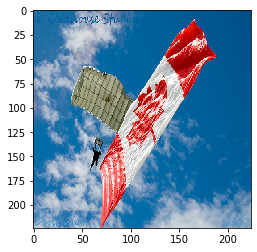

Changing image: 
Logits:  [0.00410552 0.03984443 0.08553879 0.1616692  0.01376297 0.0154475
 0.42011312 0.2125075  0.04361831 0.00339269]
Predicted:  6
Real:  6


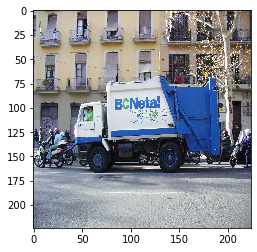

In [49]:
attacked_img, changed_img = choose_images(model, attack_gen=attack_gen)

Loss :  0.072587185
Predict of changing image:  2
Logits of changing image:  [0.07326687 0.09782863 0.11933944 0.10857779 0.10593503 0.11003485
 0.10593398 0.10826081 0.08275738 0.08806518]
Logits of attacked image:  [1.8706002e-03 1.5601311e-03 6.8498370e-03 4.3075404e-04 5.9499671e-03
 1.7326683e-02 3.5854040e-03 1.1121038e-03 6.9242775e-02 8.9207178e-01]
Changed image:


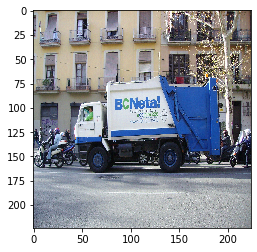

Source image to be changed:


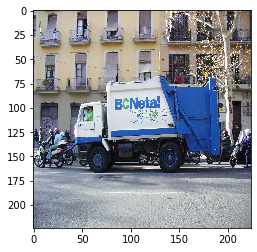

Loss :  0.00043740682
Predict of changing image:  9
Logits of changing image:  [3.0718237e-08 2.2461517e-08 1.3798034e-03 2.8218621e-05 4.3520967e-07
 9.5872863e-08 9.2394920e-08 9.6814168e-10 1.2846178e-01 8.7012953e-01]
Logits of attacked image:  [1.8706002e-03 1.5601311e-03 6.8498370e-03 4.3075404e-04 5.9499671e-03
 1.7326683e-02 3.5854040e-03 1.1121038e-03 6.9242775e-02 8.9207178e-01]
Changed image:


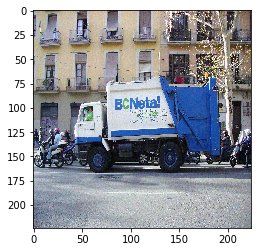

Source image to be changed:


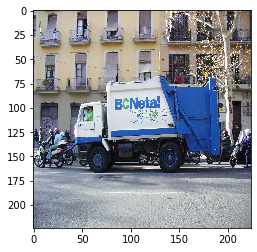

Loss :  0.0004751705
Predict of changing image:  9
Logits of changing image:  [3.67993422e-08 2.70836154e-08 1.48015108e-03 3.15373109e-05
 5.08672599e-07 1.13948445e-07 1.09813733e-07 1.20900778e-09
 1.30702138e-01 8.67785394e-01]
Logits of attacked image:  [1.8706002e-03 1.5601311e-03 6.8498370e-03 4.3075404e-04 5.9499671e-03
 1.7326683e-02 3.5854040e-03 1.1121038e-03 6.9242775e-02 8.9207178e-01]
Changed image:


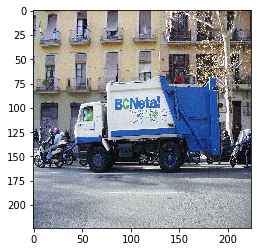

Source image to be changed:


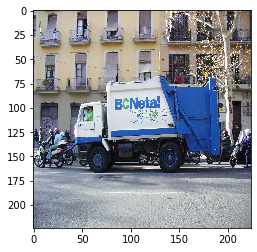

Loss :  0.0005815531
Predict of changing image:  9
Logits of changing image:  [5.7756132e-08 4.3203254e-08 1.7633141e-03 4.1618976e-05 7.5070704e-07
 1.7534786e-07 1.6898038e-07 2.1049589e-09 1.3643612e-01 8.6175781e-01]
Logits of attacked image:  [1.8706002e-03 1.5601311e-03 6.8498370e-03 4.3075404e-04 5.9499671e-03
 1.7326683e-02 3.5854040e-03 1.1121038e-03 6.9242775e-02 8.9207178e-01]
Changed image:


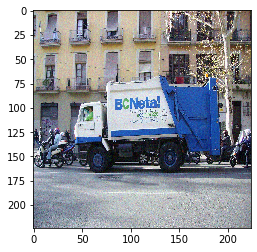

Source image to be changed:


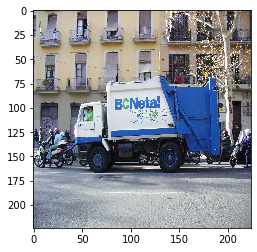

In [60]:
attack(model, attacked_img, changed_img, eps=0.01, fn=tf.sign, with_jpeg=False)

Loss :  0.07412056
Predict of changing image:  2
Logits of changing image:  [0.07515312 0.10132201 0.11541945 0.10717952 0.10794833 0.11239855
 0.10909352 0.11451405 0.07681633 0.08015519]
Logits of attacked image:  [1.8706002e-03 1.5601311e-03 6.8498370e-03 4.3075404e-04 5.9499671e-03
 1.7326683e-02 3.5854040e-03 1.1121038e-03 6.9242775e-02 8.9207178e-01]
Changed image:


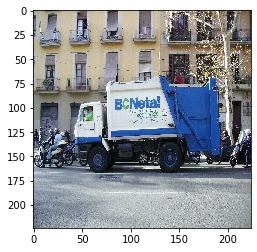

Source image to be changed:


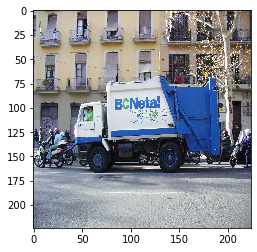

Loss :  0.008521415
Predict of changing image:  9
Logits of changing image:  [1.01977435e-04 1.07276319e-04 3.54168378e-02 4.32713563e-03
 5.29478246e-04 2.24885778e-04 2.39767134e-04 2.22989893e-05
 2.73089468e-01 6.85940862e-01]
Logits of attacked image:  [1.8706002e-03 1.5601311e-03 6.8498370e-03 4.3075404e-04 5.9499671e-03
 1.7326683e-02 3.5854040e-03 1.1121038e-03 6.9242775e-02 8.9207178e-01]
Changed image:


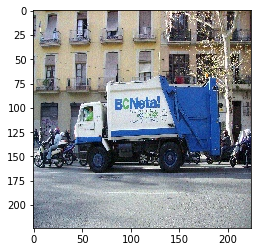

Source image to be changed:


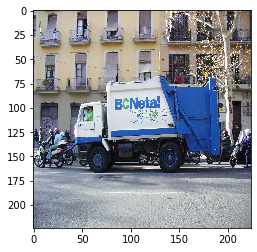

Loss :  0.009184083
Predict of changing image:  9
Logits of changing image:  [8.8010478e-05 9.6270989e-05 3.6878951e-02 4.1553737e-03 5.0235429e-04
 1.9677711e-04 2.2406504e-04 1.9222454e-05 2.8031743e-01 6.7752159e-01]
Logits of attacked image:  [1.8706002e-03 1.5601311e-03 6.8498370e-03 4.3075404e-04 5.9499671e-03
 1.7326683e-02 3.5854040e-03 1.1121038e-03 6.9242775e-02 8.9207178e-01]
Changed image:


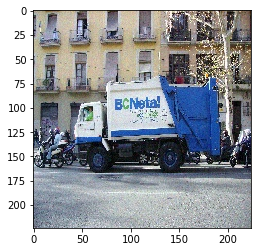

Source image to be changed:


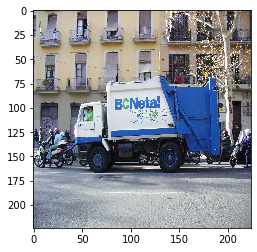

Loss :  0.008541673
Predict of changing image:  9
Logits of changing image:  [9.8359720e-05 1.0380677e-04 3.5292570e-02 4.2551360e-03 5.1723182e-04
 2.1742187e-04 2.3338691e-04 2.1398320e-05 2.7346092e-01 6.8579978e-01]
Logits of attacked image:  [1.8706002e-03 1.5601311e-03 6.8498370e-03 4.3075404e-04 5.9499671e-03
 1.7326683e-02 3.5854040e-03 1.1121038e-03 6.9242775e-02 8.9207178e-01]
Changed image:


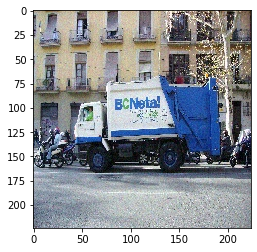

Source image to be changed:


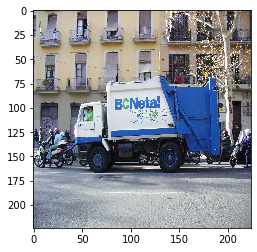

In [59]:
attack(model, attacked_img, changed_img, eps=0.01, fn=tf.sign, with_jpeg=True)

В обоих случаях атака прошла успешно, но в случае с jpeg уверенность модели стала чуть меньше.

Found 3925 images belonging to 10 classes.
Attacked image: 
Logits:  [0.00808061 0.32841763 0.47578073 0.0079947  0.10944018 0.00720512
 0.04380159 0.01491275 0.00388052 0.00048631]
Predicted:  2
Real:  2


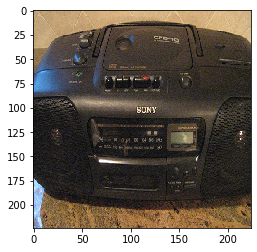

Changing image: 
Logits:  [1.11385383e-01 8.64554822e-01 3.33102793e-03 3.77244753e-04
 4.02221165e-04 1.91241983e-04 4.14167414e-04 5.98762475e-04
 1.86414216e-02 1.03603896e-04]
Predicted:  1
Real:  1


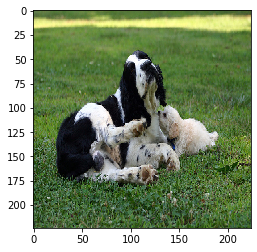

In [63]:
attacked_img, changed_img = choose_images(model, attack_gen=attack_gen)

Loss :  0.13090813
Predict of changing image:  8
Logits of changing image:  [8.8920733e-03 3.3316010e-08 6.1687487e-08 2.5454752e-10 5.5711165e-09
 7.0878849e-03 6.1562659e-08 3.5830978e-12 9.8401976e-01 1.6224242e-07]
Logits of attacked image:  [0.00808061 0.32841763 0.47578073 0.0079947  0.10944018 0.00720512
 0.04380159 0.01491275 0.00388052 0.00048631]
Changed image:


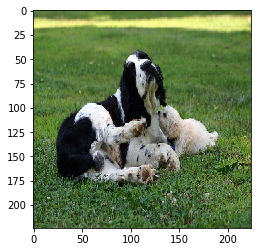

Source image to be changed:


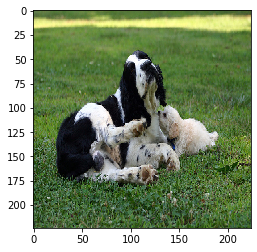

Loss :  0.023344524
Predict of changing image:  2
Logits of changing image:  [0.07553396 0.10127296 0.11470322 0.1071106  0.10751748 0.11287222
 0.10866482 0.11459401 0.07691479 0.08081588]
Logits of attacked image:  [0.00808061 0.32841763 0.47578073 0.0079947  0.10944018 0.00720512
 0.04380159 0.01491275 0.00388052 0.00048631]
Changed image:


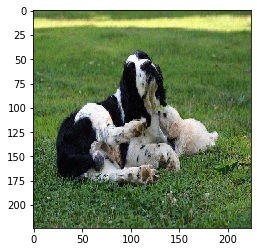

Source image to be changed:


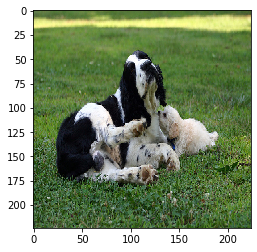

Loss :  0.023344524
Predict of changing image:  2
Logits of changing image:  [0.07553396 0.10127296 0.11470322 0.1071106  0.10751748 0.11287222
 0.10866482 0.11459401 0.07691479 0.08081588]
Logits of attacked image:  [0.00808061 0.32841763 0.47578073 0.0079947  0.10944018 0.00720512
 0.04380159 0.01491275 0.00388052 0.00048631]
Changed image:


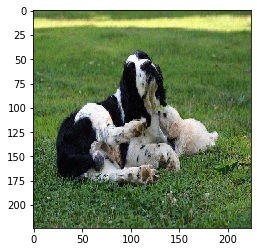

Source image to be changed:


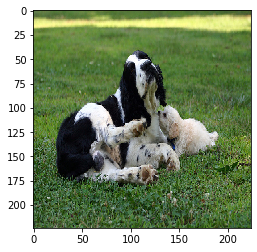

Loss :  0.023344524
Predict of changing image:  2
Logits of changing image:  [0.07553396 0.10127296 0.11470322 0.1071106  0.10751748 0.11287222
 0.10866482 0.11459401 0.07691479 0.08081588]
Logits of attacked image:  [0.00808061 0.32841763 0.47578073 0.0079947  0.10944018 0.00720512
 0.04380159 0.01491275 0.00388052 0.00048631]
Changed image:


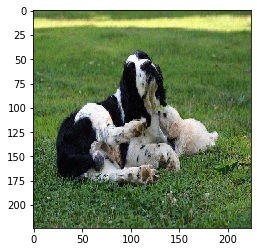

Source image to be changed:


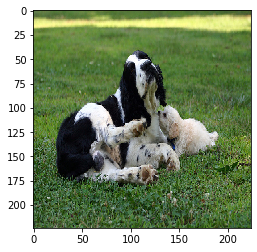

In [64]:
attack(model, attacked_img, changed_img, eps=0.01, fn=tf.sign, with_jpeg=False)

Found 3925 images belonging to 10 classes.
Attacked image: 
Logits:  [9.0407509e-01 6.8672910e-02 1.3680318e-04 3.6331813e-04 2.3461003e-05
 1.1950669e-04 2.3423524e-04 4.9991078e-05 2.4921078e-02 1.4036286e-03]
Predicted:  0
Real:  0


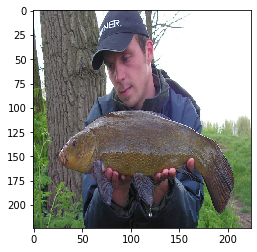

Changing image: 
Logits:  [0.03936813 0.00951453 0.05131004 0.18287791 0.3971985  0.08067117
 0.00932604 0.15601665 0.05823332 0.0154838 ]
Predicted:  4
Real:  4


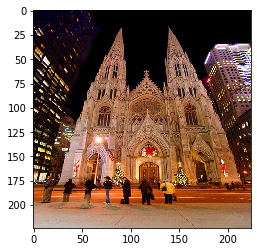

In [85]:
attacked_img, changed_img = choose_images(model, attack_gen=attack_gen)

Loss :  0.07748936
Predict of changing image:  7
Logits of changing image:  [0.07306866 0.10237362 0.11410894 0.1108485  0.09904061 0.11158132
 0.11368196 0.1195034  0.07867862 0.0771144 ]
Logits of attacked image:  [9.0407509e-01 6.8672910e-02 1.3680318e-04 3.6331813e-04 2.3461003e-05
 1.1950669e-04 2.3423524e-04 4.9991078e-05 2.4921078e-02 1.4036286e-03]
Changed image:


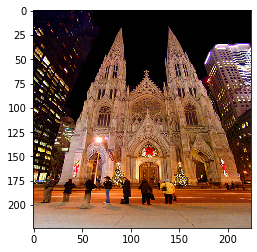

Source image to be changed:


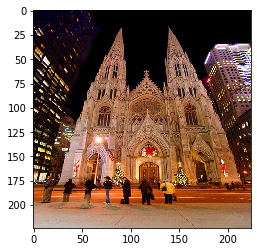

Loss :  0.07702188
Predict of changing image:  2
Logits of changing image:  [0.07553396 0.10127296 0.11470322 0.1071106  0.10751748 0.11287222
 0.10866482 0.11459401 0.07691479 0.08081588]
Logits of attacked image:  [9.0407509e-01 6.8672910e-02 1.3680318e-04 3.6331813e-04 2.3461003e-05
 1.1950669e-04 2.3423524e-04 4.9991078e-05 2.4921078e-02 1.4036286e-03]
Changed image:


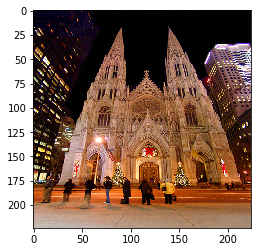

Source image to be changed:


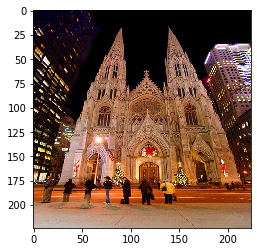

Loss :  0.07702188
Predict of changing image:  2
Logits of changing image:  [0.07553396 0.10127296 0.11470322 0.1071106  0.10751748 0.11287222
 0.10866482 0.11459401 0.07691479 0.08081588]
Logits of attacked image:  [9.0407509e-01 6.8672910e-02 1.3680318e-04 3.6331813e-04 2.3461003e-05
 1.1950669e-04 2.3423524e-04 4.9991078e-05 2.4921078e-02 1.4036286e-03]
Changed image:


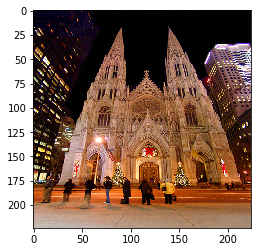

Source image to be changed:


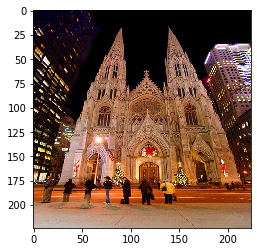

Loss :  0.07702188
Predict of changing image:  2
Logits of changing image:  [0.07553396 0.10127296 0.11470322 0.1071106  0.10751748 0.11287222
 0.10866482 0.11459401 0.07691479 0.08081588]
Logits of attacked image:  [9.0407509e-01 6.8672910e-02 1.3680318e-04 3.6331813e-04 2.3461003e-05
 1.1950669e-04 2.3423524e-04 4.9991078e-05 2.4921078e-02 1.4036286e-03]
Changed image:


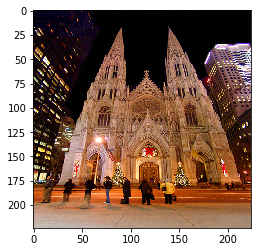

Source image to be changed:


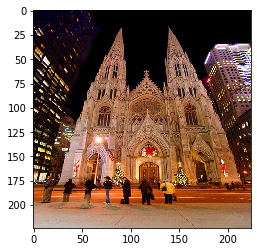

In [86]:
attack(model, attacked_img, changed_img, eps=0.005, fn=tf.sign, with_jpeg=False)

Атаки выше, как можно увидеть, не проходят.

Found 3925 images belonging to 10 classes.
Attacked image: 
Logits:  [1.73952361e-03 3.81775521e-04 2.76001962e-03 1.17293945e-04
 7.40280980e-03 2.77319486e-04 6.71977759e-05 8.34686274e-04
 9.63241458e-01 2.31779274e-02]
Predicted:  8
Real:  8


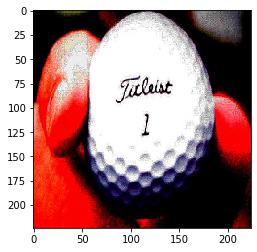

Changing image: 
Logits:  [9.8126156e-07 2.8917227e-06 9.8071534e-05 2.4133615e-06 1.3277798e-06
 1.2833669e-04 1.5609691e-04 5.1483937e-07 5.2431319e-04 9.9908507e-01]
Predicted:  9
Real:  9


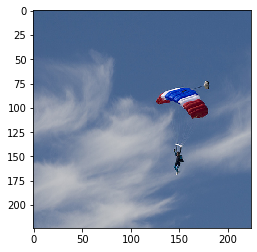

In [80]:
attacked_img, changed_img = choose_images(model, attack_gen=attack_gen)

Loss :  0.06155749
Predict of changing image:  2
Logits of changing image:  [0.00073227 0.01777281 0.37530988 0.00437643 0.13127185 0.00728031
 0.05701443 0.00232527 0.2924065  0.11151034]
Logits of attacked image:  [1.73952361e-03 3.81775521e-04 2.76001962e-03 1.17293945e-04
 7.40280980e-03 2.77319486e-04 6.71977759e-05 8.34686274e-04
 9.63241458e-01 2.31779274e-02]
Changed image:


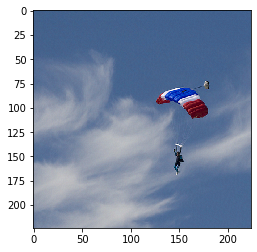

Source image to be changed:


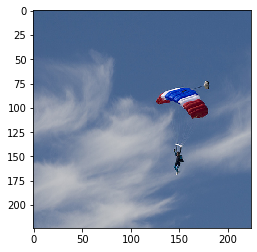

Loss :  0.004581352
Predict of changing image:  8
Logits of changing image:  [3.0760446e-11 5.2680655e-08 6.1334699e-04 1.2773633e-04 6.5099908e-04
 1.9063481e-08 1.7132159e-08 1.8893691e-10 8.1819820e-01 1.8040970e-01]
Logits of attacked image:  [1.73952361e-03 3.81775521e-04 2.76001962e-03 1.17293945e-04
 7.40280980e-03 2.77319486e-04 6.71977759e-05 8.34686274e-04
 9.63241458e-01 2.31779274e-02]
Changed image:


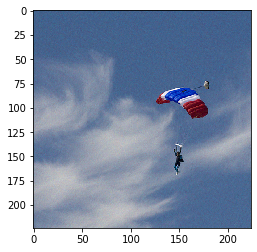

Source image to be changed:


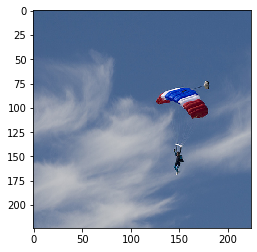

Loss :  5.7459263e-05
Predict of changing image:  8
Logits of changing image:  [8.8105975e-14 8.7965644e-09 1.9736963e-03 5.4564665e-05 3.2907347e-03
 4.0184731e-10 5.5112630e-09 5.9474712e-12 9.8348099e-01 1.1199916e-02]
Logits of attacked image:  [1.73952361e-03 3.81775521e-04 2.76001962e-03 1.17293945e-04
 7.40280980e-03 2.77319486e-04 6.71977759e-05 8.34686274e-04
 9.63241458e-01 2.31779274e-02]
Changed image:


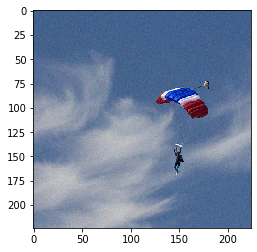

Source image to be changed:


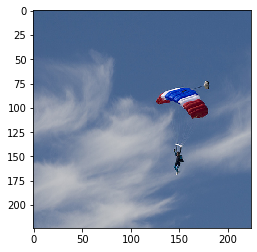

Loss :  0.04245977
Predict of changing image:  8
Logits of changing image:  [2.1036104e-14 1.7899483e-10 4.2920537e-06 5.2511240e-07 1.5661428e-05
 1.3968610e-10 1.8551901e-11 8.3865694e-14 5.0934833e-01 4.9063122e-01]
Logits of attacked image:  [1.73952361e-03 3.81775521e-04 2.76001962e-03 1.17293945e-04
 7.40280980e-03 2.77319486e-04 6.71977759e-05 8.34686274e-04
 9.63241458e-01 2.31779274e-02]
Changed image:


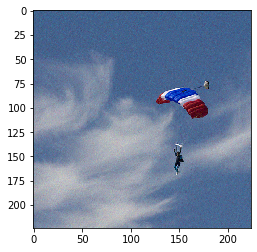

Source image to be changed:


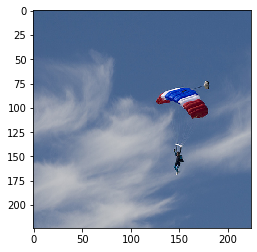

In [83]:
attack(model, attacked_img, changed_img, eps=0.005, fn=tf.sign, with_jpeg=False)

Loss :  0.18374105
Predict of changing image:  9
Logits of changing image:  [1.7653820e-05 1.1279921e-04 2.9365302e-03 7.0983195e-05 1.2360956e-04
 1.1707610e-03 2.3926275e-03 1.9793733e-05 8.1406115e-03 9.8501462e-01]
Logits of attacked image:  [1.73952361e-03 3.81775521e-04 2.76001962e-03 1.17293945e-04
 7.40280980e-03 2.77319486e-04 6.71977759e-05 8.34686274e-04
 9.63241458e-01 2.31779274e-02]
Changed image:


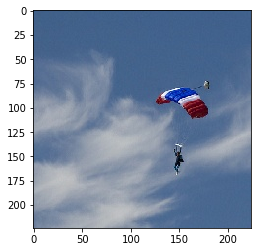

Source image to be changed:


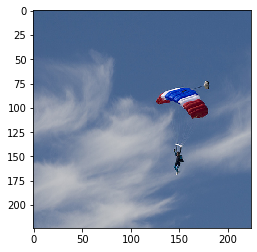

Loss :  0.14953695
Predict of changing image:  9
Logits of changing image:  [2.1839058e-07 9.9929212e-06 1.8903631e-03 7.1224691e-05 3.9534550e-04
 2.5063116e-05 2.5785052e-05 3.1477740e-07 1.0416852e-01 8.9341325e-01]
Logits of attacked image:  [1.73952361e-03 3.81775521e-04 2.76001962e-03 1.17293945e-04
 7.40280980e-03 2.77319486e-04 6.71977759e-05 8.34686274e-04
 9.63241458e-01 2.31779274e-02]
Changed image:


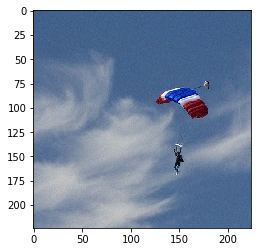

Source image to be changed:


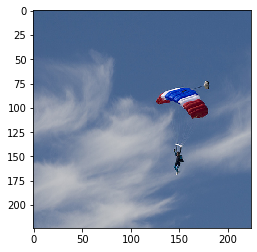

Loss :  0.07261168
Predict of changing image:  9
Logits of changing image:  [3.0013165e-08 9.0677649e-06 8.6985026e-03 1.7694145e-04 2.2243131e-03
 8.1352473e-06 2.6604153e-05 1.3074003e-07 3.6194527e-01 6.2691104e-01]
Logits of attacked image:  [1.73952361e-03 3.81775521e-04 2.76001962e-03 1.17293945e-04
 7.40280980e-03 2.77319486e-04 6.71977759e-05 8.34686274e-04
 9.63241458e-01 2.31779274e-02]
Changed image:


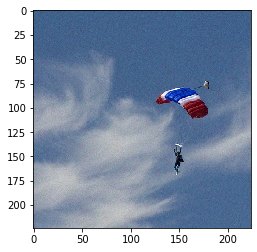

Source image to be changed:


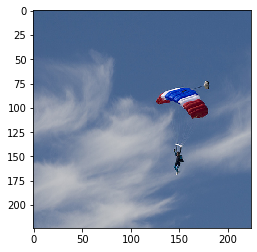

Loss :  0.15527625
Predict of changing image:  9
Logits of changing image:  [3.6866106e-09 5.0611487e-07 2.5131262e-04 8.5036045e-06 8.1091719e-05
 1.3778426e-06 8.1970558e-07 5.7925447e-09 8.8777967e-02 9.1087842e-01]
Logits of attacked image:  [1.73952361e-03 3.81775521e-04 2.76001962e-03 1.17293945e-04
 7.40280980e-03 2.77319486e-04 6.71977759e-05 8.34686274e-04
 9.63241458e-01 2.31779274e-02]
Changed image:


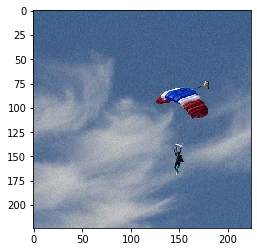

Source image to be changed:


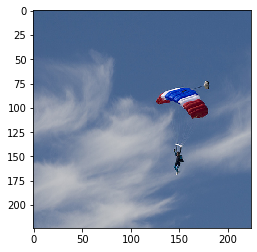

In [84]:
attack(model, attacked_img, changed_img, eps=0.005, fn=tf.sign, with_jpeg=True)

В последнем случае атака произошла успешно только когда мы не кодировали картинку в jpeg, в противном же случае класс остался тем же.

При многих перезапусках на разных картинках в основном  успешной атаки не происходило и измененная картинка имела почти равномерное распределение по всем классам, но бывали случаи когда атака проходила даже если картинка прогонялась через jpeg (первая атака в данном ноутбуке).